In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

In [4]:
X = data[['Spending Score (1-100)']]

In [5]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
    inertia.append(kmeans.inertia_)

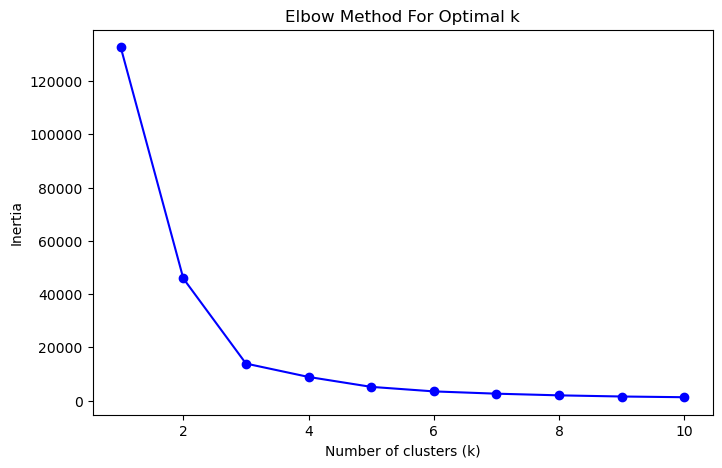

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
data['Cluster'] = kmeans.fit_predict(X)

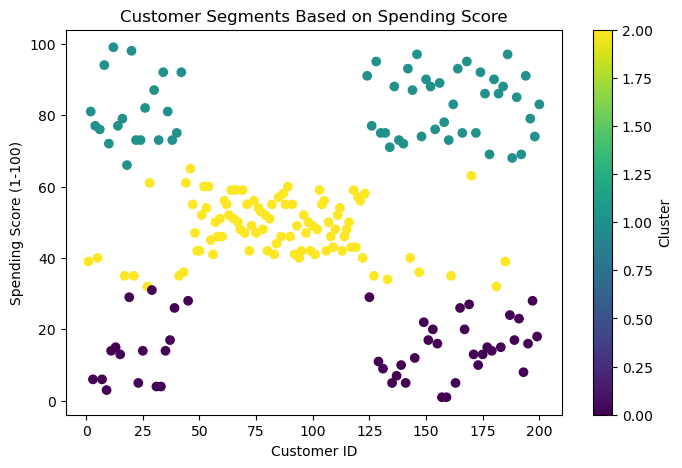

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(data['CustomerID'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Customer ID')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments Based on Spending Score')
plt.colorbar(label='Cluster')
plt.show()

In [9]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        1  
2        0  
3        1  
4        2  
